# Proyek Analisis Data: E-Commerce
- Nama: Ahmad Agriansyah
- Email: ahmadagriansyah1@gmail.com
- Id Dicoding: ahmadagriansyah

## Menentukan Pertanyaan Bisnis

- Berapa banyaknya order/invoice per bulan?
- Negara dengan pembelian terbanyak per bulan? (berdasarkan 5 negara teratas periode terakhir)

## Import Semua Packages/Library yang Digunakan

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [32]:
customer_dataset = pd.read_csv('Data/customers_dataset.csv')
order_dataset = pd.read_csv('Data/orders_dataset.csv')

customer_order_df = pd.merge(
    left=customer_dataset,
    right=order_dataset,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)

customer_order_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


### Assessing Data

In [33]:
#cek banyaknya baris dan kolom data
customer_order_df.shape

(99441, 12)

In [34]:
##Cek tipe data tiap kolom
customer_order_df.dtypes

customer_id                      object
customer_unique_id               object
customer_zip_code_prefix          int64
customer_city                    object
customer_state                   object
order_id                         object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [35]:
customer_order_df.drop(["order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"], axis=1, inplace=True)

In [36]:
#transform waktu pembelian ke tipe data waktu
customer_order_df["order_purchase_timestamp"] = customer_order_df["order_purchase_timestamp"].apply(lambda x: np.datetime64(x))

In [37]:
##Cek tipe data timestamp setelah diubah
customer_order_df.dtypes

customer_id                         object
customer_unique_id                  object
customer_zip_code_prefix             int64
customer_city                       object
customer_state                      object
order_id                            object
order_status                        object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [38]:
##Cek data null
customer_order_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_id                    0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [39]:
##cek data duplikat
customer_order_df.duplicated().sum()

0

### Cleaning Data

In [40]:
customer_order_df = customer_order_df.loc[customer_order_df["order_purchase_timestamp"] < "2018-09-1"]
customer_order_df = customer_order_df.loc[customer_order_df["order_purchase_timestamp"] > "2016-12-31"]

In [41]:
customer_order_df.to_csv(r"C:\Kerja\E-Commerce Dataset\Submission\Dashboard\customer_order.csv")

## Exploratory Data Analysis (EDA)

### Explore ...

In [42]:
customer_order_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp
count,99092,99092,99092.000000,99092,99092,99092,99092,99092
unique,99092,95774,NaN,4116,27,99092,8,NaN
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,NaN
freq,1,17,NaN,15501,41621,1,96211,NaN
mean,NaN,NaN,35128.755702,NaN,NaN,NaN,NaN,2018-01-01 19:20:13.603842816
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2017-01-05 11:56:06
25%,NaN,NaN,11335.000000,NaN,NaN,NaN,NaN,2017-09-13 17:28:50
50%,NaN,NaN,24415.000000,NaN,NaN,NaN,NaN,2018-01-19 16:01:26
75%,NaN,NaN,58865.000000,NaN,NaN,NaN,NaN,2018-05-04 19:53:33.249999872
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-08-31 16:13:44


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [52]:
#pembuatan tabel monthly orders
monthly_orders_df = customer_order_df.set_index("order_purchase_timestamp")["order_id"].resample("M").nunique()
monthly_orders_df

order_purchase_timestamp
2017-01-31     800
2017-02-28    1780
2017-03-31    2682
2017-04-30    2404
2017-05-31    3700
2017-06-30    3245
2017-07-31    4026
2017-08-31    4331
2017-09-30    4285
2017-10-31    4631
2017-11-30    7544
2017-12-31    5673
2018-01-31    7269
2018-02-28    6728
2018-03-31    7211
2018-04-30    6939
2018-05-31    6873
2018-06-30    6167
2018-07-31    6292
2018-08-31    6512
Freq: M, Name: order_id, dtype: int64

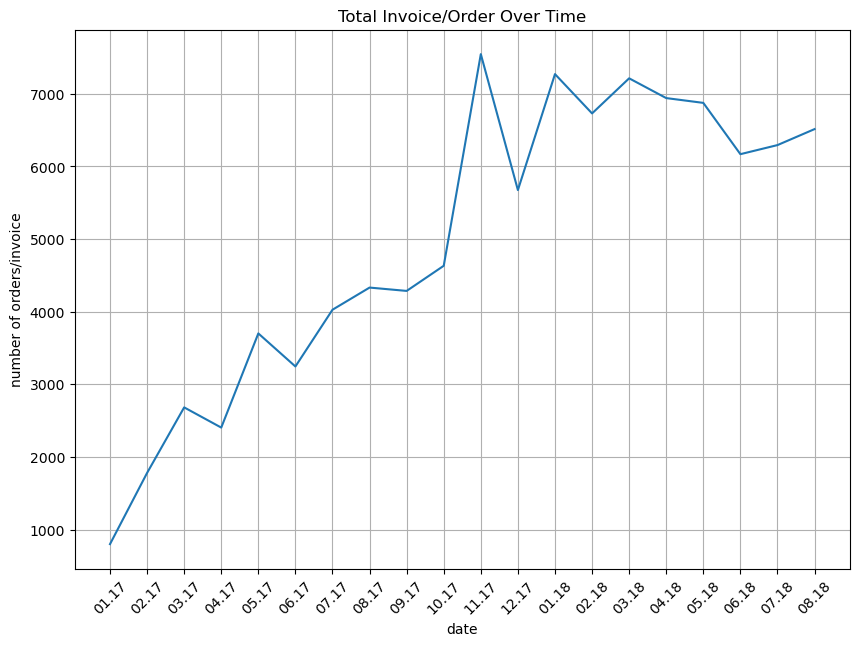

In [45]:
#visualisasi data orders per bulan
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid = True,
    figsize = (10,7),
    legend = False
)

ax.set_xlabel("date")
ax.set_ylabel("number of orders/invoice")
ax.set_title("Total Invoice/Order Over Time")

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime("%m.%y") for x in monthly_orders_df.index],
    rotation = 45
)

plt.show()

### Pertanyaan 2:

In [46]:
#pembuatan tabel monthly orders by state
customer_state_df = pd.DataFrame(
    customer_order_df.set_index("order_purchase_timestamp").groupby([
        pd.Grouper(freq="M"), "customer_state"
    ])["order_id"].count()
)

customer_state_df

order_id
order_purchase_timestamp customer_state          
2017-01-31               AC                     2
                         AL                     2
                         BA                    25
                         CE                     9
                         DF                    13
...                                           ...
2018-08-31               RS                   300
                         SC                   206
                         SE                    23
                         SP                  3253
                         TO                    13

[533 rows x 1 columns]

In [47]:
#mencari 5 negara teratas berdasarkan invoice/orders terbanyak di periode terakhir
last_month_customer_state_df = customer_state_df.loc["2018-08-31"].sort_values(
    by="order_id", ascending=False
).reset_index()

last_month_customer_state_df

,customer_state,order_id
0,SP,3253
1,RJ,745
2,MG,708
3,PR,333
4,RS,300
5,SC,206
6,BA,165
7,DF,145
8,GO,120
9,ES,105


In [61]:
#group 5 negara teratas berdasarkan invoice/orders terbanyak
state_order_df = pd.DataFrame(
    customer_order_df.loc[
        customer_order_df["customer_state"].isin(["SP","RJ","MG","PR","RS"])
    ].set_index("order_purchase_timestamp").groupby([
        pd.Grouper(freq="M"), "customer_state"
    ])["order_id"].count()
)

state_order_df

order_id
order_purchase_timestamp customer_state          
2017-01-31               MG                   108
                         PR                    65
                         RJ                    97
                         RS                    54
                         SP                   299
...                                           ...
2018-08-31               MG                   708
                         PR                   333
                         RJ                   745
                         RS                   300
                         SP                  3253

[100 rows x 1 columns]

In [62]:
#transpose tabel
trending_state_df = state_order_df.reset_index().pivot(index="order_purchase_timestamp", columns="customer_state").fillna(0)

trending_state_df = trending_state_df.reset_index()
trending_state_df = trending_state_df.set_index("order_purchase_timestamp")
trending_state_df.columns = trending_state_df.columns.droplevel(0)

trending_state_df

customer_state,MG,PR,RJ,RS,SP
order_purchase_timestamp,,,,,
2017-01-31,108,65,97,54,299
2017-02-28,259,118,254,105,654
2017-03-31,358,127,395,151,1010
2017-04-30,275,114,338,139,908
2017-05-31,428,213,488,208,1425
2017-06-30,363,170,412,221,1331
2017-07-31,453,203,571,249,1604
2017-08-31,469,223,562,299,1729
2017-09-30,507,183,609,278,1638


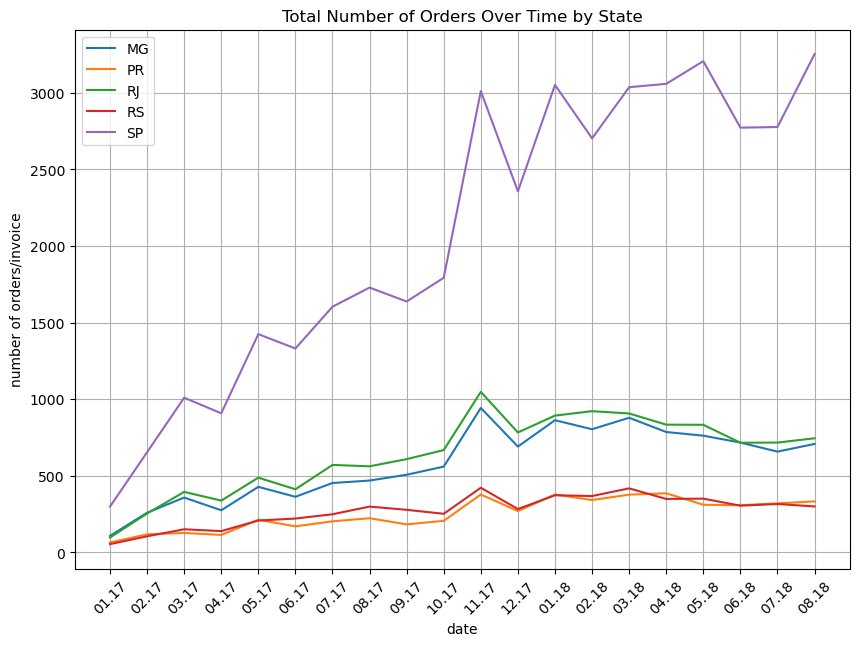

In [63]:
#visualisasi data orders per bulan
ax = pd.DataFrame(trending_state_df.values).plot(
    grid = True,
    figsize = (10,7),
    legend = False
)

ax.set_xlabel("date")
ax.set_ylabel("number of orders/invoice")
ax.set_title("Total Number of Orders Over Time by State")

ax.legend(trending_state_df.columns, loc="upper left")

plt.xticks(
    range(len(trending_state_df.index)),
    [x.strftime("%m.%y") for x in trending_state_df.index],
    rotation = 45
)

plt.show()

## Conclusion

- Jumlah orders/invoice tiap bulan secara umum mengalami peningkatan dengan invoice terbanyak jatuh pada bulan November 2017
- Ada 5 negara yang menjadi basis pelanggan terbanyak perusahaan ini secara berurutan yaitu SP, RJ, MG, RS dan PR. Negara SP menjadi negara dengan basis pelanggan terbanyak perusahaan ini dengan perbedaan yang signifikan dibandingkan negara lainnya sehingga kegiatan pemasaran dan operasional perusahaan pada negara SP menjadi concern utama dibandingkan negara lainnya